In [149]:
%matplotlib notebook
import datetime
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np

display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', 50)

# Load datasets

In [150]:
start_year = 1984
end_year = 2018

In [162]:
df_season_summaries = pd.read_csv("../Data/nba_season_summaries_{}_{}.csv".format(start_year, end_year), index_col=[0, 1])
# For MultiIndex slicing support
df_season_summaries.sort_index(inplace=True) 
df_boxscores = pd.read_csv("../Data/nba_boxscores_{}_{}.csv".format(start_year, end_year), index_col=0, parse_dates=[1], infer_datetime_format=True)

In [152]:
df_season_summaries.head()

Rk   Age     W     L    PW    PL   MOV   SOS  \
Season Team                                                                  
1984   Atlanta Hawks        14.0  26.6  40.0  42.0  37.0  45.0 -1.29  0.22   
       Boston Celtics        1.0  28.0  62.0  20.0  57.0  25.0  6.56 -0.14   
       Chicago Bulls        23.0  24.4  27.0  55.0  28.0  54.0 -5.18  0.50   
       Cleveland Cavaliers  21.0  25.4  28.0  54.0  30.0  52.0 -4.26  0.55   
       Dallas Mavericks     11.0  24.7  43.0  39.0  42.0  40.0  0.43 -0.27   

                             SRS   ORtg   DRtg  NetRtg  Pace    FTr   3PAr  \
Season Team                                                                  
1984   Atlanta Hawks       -1.08  105.5  106.9    -1.4  95.3  0.355  0.016   
       Boston Celtics       6.42  110.9  104.4     6.5  99.7  0.333  0.032   
       Chicago Bulls       -4.69  102.4  107.5    -5.1  99.8  0.360  0.017   
       Cleveland Cavaliers -3.71  104.1  108.5    -4.4  97.4  0.301  0.023   
       Dallas Mavericks     0.15  110.0  109.6     0.4  99.0  0.325  0.025   

                              TS%   eFG%  TOV%  ORB%  FT/FGA  eFG%.1  TOV%.1  \
Season Team                                                                    
1984   Atlanta Hawks        0.529  0.476  14.4  31.6   0.270   0.482    15.1   
       Boston Celtics       0.554  0.504  14.6  34.2   0.264   0.475    13.8   
       Chicago Bulls        0.526  0.475  16.3  32.3   0.268   0.497    15.6   
       Cleveland Cavaliers  0.512  0.468  14.0  33.5   0.224   0.490    13.2   
       Dallas Mavericks     0.547  0.503  13.6  31.7   0.245   0.503    14.4   

                            DRB%  FT/FGA.1                  Arena   Attend.  \
Season Team                                                                   
1984   Atlanta Hawks        65.2     0.268          Omni Coliseum  286049.0   
       Boston Celtics       69.7     0.225          Boston Garden  606857.0   
       Chicago Bulls        67.2     0.266        Chicago Stadium  256430.0   
       Cleveland Cavaliers  70.8     0.280  Coliseum at Richfield  208094.0   
       Dallas Mavericks     65.7     0.232          Reunion Arena  538162.0   

                            Attend./G        ELO  
Season Team                                       
1984   Atlanta Hawks              NaN  1510.2290  
       Boston Celtics             NaN  1686.8444  
       Chicago Bulls              NaN  1334.6404  
       Cleveland Cavaliers        NaN  1374.2787  
       Dallas Mavericks           NaN  1509.9365

In [153]:
df_boxscores.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carmelo1_pre,carmelo2_pre,carmelo1_post,carmelo2_post,carmelo_prob1,carmelo_prob2,score1,score2,team2_Pace,team2_eFG%,team2_TOV%,team2_ORB%,team2_FT/FGA,team2_ORtg,team2_DRtg,team2_NetRtg,team1_Pace,team1_eFG%,team1_TOV%,team1_ORB%,team1_FT/FGA,team1_ORtg,team1_DRtg,team1_NetRtg
24793,1983-10-28,1984,0,NaN,CLE,NYK,1381.7836,1585.6497,0.354824,0.645176,1376.2715,1591.1617,NaN,NaN,NaN,NaN,NaN,NaN,106.0,113.0,90.7,0.590,15.6,48.5,0.269,124.5,116.8,7.7,90.7,0.513,15.8,48.6,0.333,116.8,124.5,-7.7
24794,1983-10-28,1984,0,NaN,PHI,WSB,1680.4036,1542.6188,0.797186,0.202814,1682.3088,1540.7135,NaN,NaN,NaN,NaN,NaN,NaN,117.0,114.0,103.5,0.561,18.1,27.8,0.268,110.1,113.0,-2.9,103.5,0.512,16.6,36.6,0.402,113.0,110.1,2.9
24795,1983-10-28,1984,0,NaN,DEN,UTA,1538.7487,1430.0630,0.768754,0.231246,1543.8461,1424.9656,NaN,NaN,NaN,NaN,NaN,NaN,139.0,125.0,108.1,0.500,5.8,21.3,0.250,115.6,128.6,-13.0,108.1,0.539,8.5,41.3,0.284,128.6,115.6,13.0
24796,1983-10-28,1984,0,NaN,POR,SDC,1529.3440,1378.8689,0.808741,0.191259,1533.4425,1374.7704,NaN,NaN,NaN,NaN,NaN,NaN,107.0,93.0,95.0,0.500,17.8,20.6,0.348,97.9,112.6,-14.7,95.0,0.506,15.3,27.3,0.309,112.6,97.9,14.7
24797,1983-10-28,1984,0,NaN,SEA,GSW,1540.0374,1436.8497,0.763080,0.236920,1532.6714,1444.2157,NaN,NaN,NaN,NaN,NaN,NaN,109.0,110.0,101.6,0.472,15.3,47.7,0.292,108.3,107.3,1.0,101.6,0.534,19.1,23.5,0.405,107.3,108.3,-1.0


# Functions for querying/masking

In [154]:
boxscore_season_range_mask = lambda df, start_year, end_year:  (df["season"] >= start_year) & (df["season"] <= end_year)
boxscore_date_range_mask = lambda df, start_date, end_date: (df["date"] >= start_date) & (df["date"] <= end_date)
boxscore_team_mask = lambda df, team_initials: (df["team1"] == team_initials) | (df["team2"] == team_initials)
boxscore_regular_season_mask = lambda df: pd.isnull(df["playoff"])

summary_season_range = lambda df, start_year, end_year: df.loc[start_year:end_year]
summary_season_query = lambda df, years, teams, col_names: df.loc[(years, teams), col_names]
summary_season_remove_league_average = lambda: df

# Cleaning data for plotting

In [164]:
# Only use completed seasons
df_season_summaries = df_season_summaries.loc[1984:2017]
X = df_season_summaries.columns.values.tolist()
remove_cols = ["Rk", "W", "L", "PW", "PL", "MOV", "SOS", "Arena", "Attend.", "Attend./G"]
X = [x for x in X if x not in remove_cols]
y = "W"
df_season_summaries = df_season_summaries.dropna(subset=X)

# Visualization: Regular season wins vs. season metrics

<IPython.core.display.Javascript object>


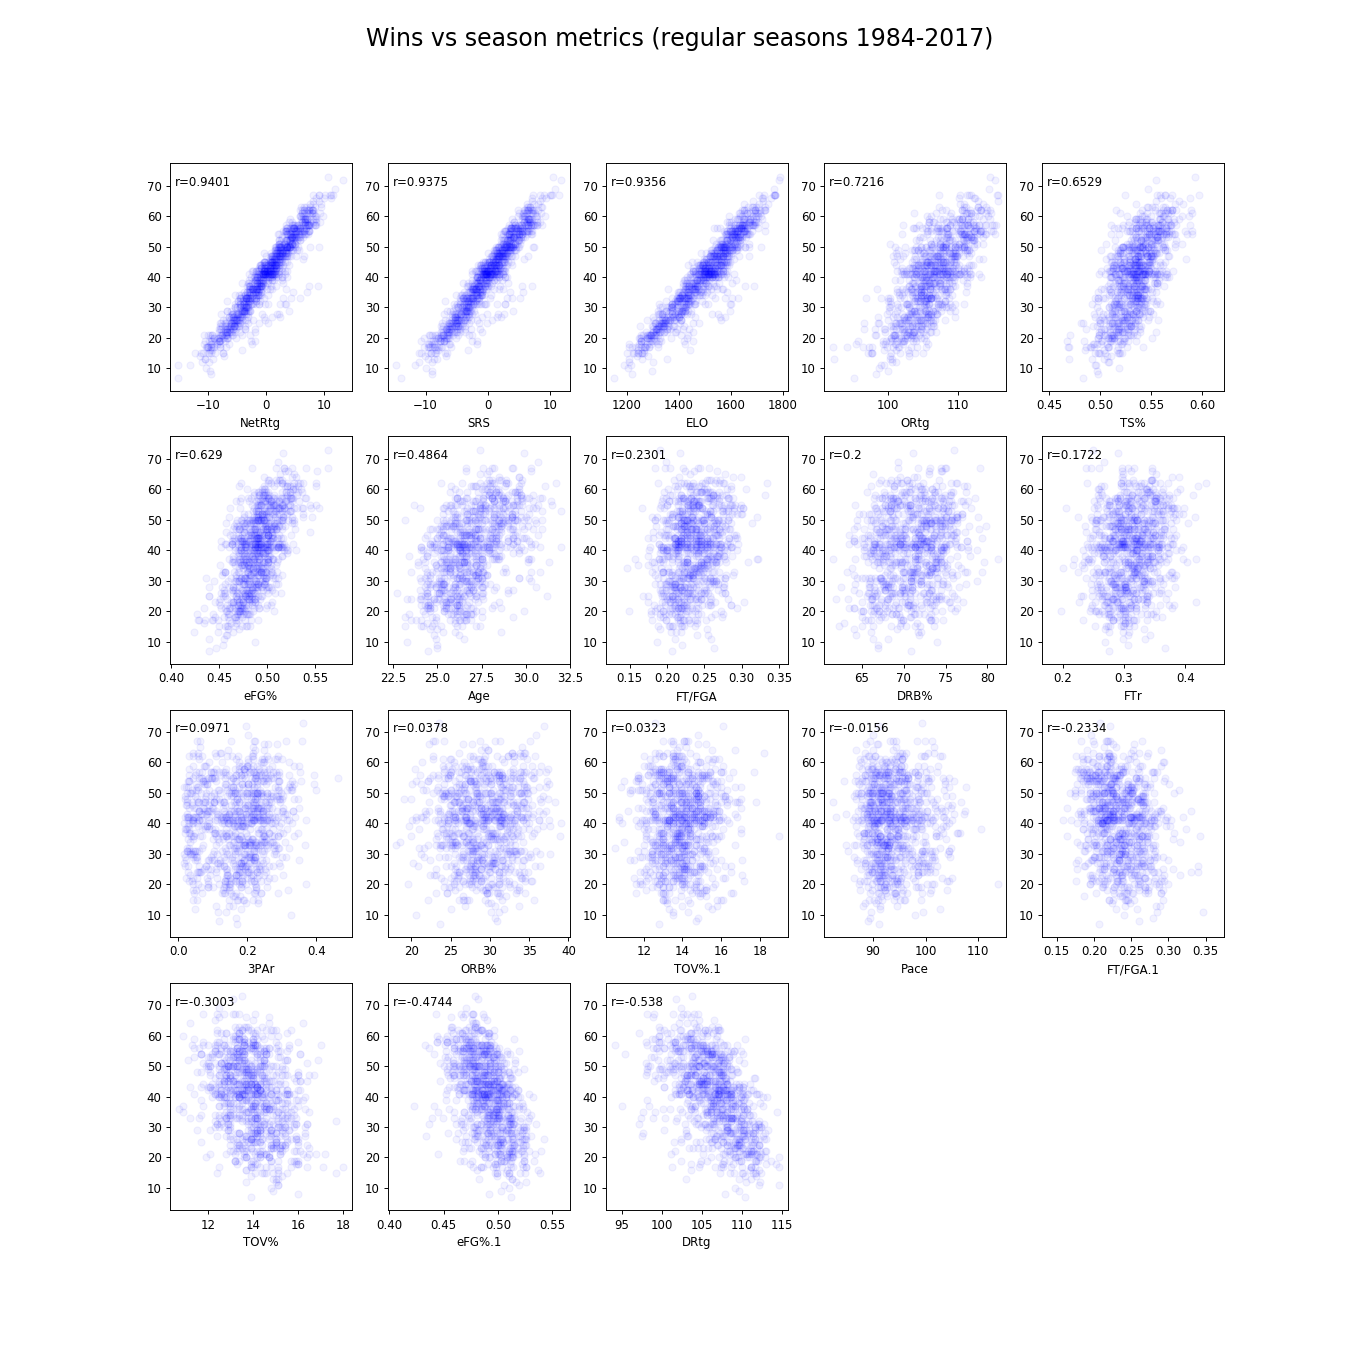

In [139]:
# Pearson r correlations of wins vs. various season metrics
correlations = [(x, df_season_summaries[[y, x]].corr().loc[x][y]) for x in X]
plt.figure(1, figsize=(16,16), dpi=85)
plt.suptitle("Wins vs season metrics (regular seasons 1984-2017)", fontsize=20)
sqrt_X = np.sqrt(len(X))
rows = int(sqrt_X)
cols = int(len(X) / int(sqrt_X)) + 1
shared_y = plt.subplot(111)
shared_y.set_ylabel("W")
for indx, (x, pearsonR) in enumerate(sorted(correlations, key=lambda t: t[1], reverse=True)):
    ax = plt.subplot(rows, cols, indx+1, sharey=shared_y) 
    ax.set_xlabel(x)
    ax.text(0.025, 0.9, "r={}".format(round(pearsonR, 4)), transform=ax.transAxes)  
    ax.scatter(df_season_summaries[x], df_season_summaries[y], c='b', alpha=0.05)